In [ ]:
import os
from xl_kv_injection_pipeline.xl_kv_injection_pipeline import ADPipeline
from diffusers import DDIMScheduler, AutoencoderKL
import torch
from utils import *
from accelerate.utils import set_seed
import random

model_name = "/your path to sdxl model"
vae = ""
lr = 0.015
iters = 2
seed =random.randint(1,1000)
mixed_precision = "bf16"
num_inference_steps = 50
guidance_scale = 5.0
pag_scale=2.0
num_images_per_prompt = 1
enable_gradient_checkpoint = True
start_layer, end_layer = 64, 70

prompt = "a beautiful lavender valley"
style_image = ["../style/4.jpg"]

scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(
    model_name, scheduler=scheduler, safety_checker=None
)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae

pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(1024, 1024)) for path in style_image])
controller = Controller(self_layers=(start_layer, end_layer))



Keyword arguments {'safety_checker': None} are not expected by ADPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from ip_adapter import IPAdapterXL
guidance_scale = 7.0
pag_scale=3.0
start_layer, end_layer = 64, 70
cache=DataCache()
controller = Controller(self_layers=(start_layer, end_layer))
prompt =""


seed=100
generator=torch.Generator(seed)
image_encoder_path = "your path to IPAdapter image encoder path "
ip_ckpt = "your path to IPAdapter path" #IPAdapter model:https://huggingface.co/h94/IP-Adapter
device = "cuda"
ip_model = IPAdapterXL(pipe, image_encoder_path, ip_ckpt, device,cache=cache,controller=controller)


Total self attention layers of Unet:  -1
Self attention layers for AD:  [64, 65, 66, 67, 68, 69]


Sample: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]


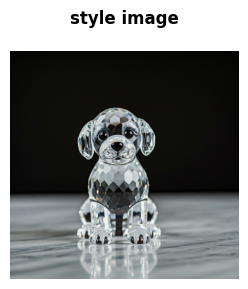

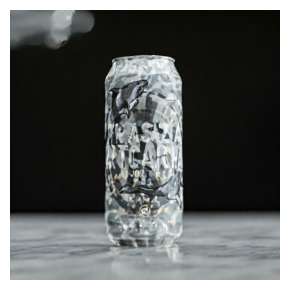

In [6]:
style_image = ["../style/38.jpg"]
image = Image.open("../IPimage/00.jpg")
image.resize((256, 256))
style_image = torch.cat([load_image(path, size=(1024, 1024)) for path in style_image])
result=ip_model.generate(pil_image=image,style_image=style_image,prompt=prompt,negative_prompt='',scale=0.5)
save_image(style_image, "../output/style.png")
save_image(result, "../output/output1.png")
show_image("../output/style.png", title="style image")
show_image("../output/output1.png", title=prompt)